In [16]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from processing_results import *
import tvb_model_reference.src.nuu_tools_simulation_human as tools

/home/master/anaconda3/envs/tvbadexgraph/lib/python3.10/site-packages/tvb/datatypes/surfaces.py:63: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


# Analyzing results Parameter Sweep with steps = 6

### All the metrics obtained
In the following dictionary one can find the strings that identify all the metrics that have been obtained from the simulations. Some of them are quite clear in their name. Others are commented with the objective of giving a bit more insight about them.

In [2]:
dict_params = {'a': 0, 'b_e': 1, 'E_L_i': 2, 'E_L_e': 3, 'T': 4}

dict_metrics = {'mean_FR_e': 5, 'mean_FR_i': 23, 'std_FR_e': 6, 'std_FR_i': 24,
                # Mean of FC and PLI matrices for both FRs
                'mean_FC_e': 7, 'mean_FC_i': 25, 'mean_PLI_e': 8, 'mean_PLI_i': 26,
                # Mean duration of up and down states
                'mean_up_e': 9, 'mean_up_i': 27, 'mean_down_e': 10, 'mean_down_i': 28,
                # all time max and minimum FR over all the regions
                'max_FR_e': 11, 'max_FR_i': 29, 
                # Peaks of PSDs. We obtain the frequency (fmax) at which the peak appears and 
                # its amplitude/power (pmax)
                # The peak has been calculted with two methods: peak with highest amplitude (amp)
                # and peak with highest prominence (prom)
                'fmax_amp_e': 12, 'pmax_amp_e': 13, 'fmax_amp_i': 30, 'pmax_amp_i': 31, 
                'fmax_prom_e': 14, 'pmax_prom_e': 15, 'fmax_prom_i': 32, 'pmax_prom_i': 33, 
                # The PSD has also been fitted to a power law b/f^a. We have obtained the slope a and
                # the score of the fitting.
                'slope_PSD_e': 16, 'score_PSD_e': 17, 'slope_PSD_i': 34, 'score_PSD_i': 35, 
                # frequencies have been divided into 5 typical bands: 'delta': (0.5, 4)Hz, 
                # 'theta': (4, 8)Hz,  'alpha': (8, 12)Hz, 'beta': (12, 30) Hz, 'gamma': (30, 100) Hz
                # and the relative power in each band has been obtained by numerical integration
                'delta_rel_p_e': 18, 'theta_rel_p_e': 19, 'alpha_rel_p_e': 20, 'beta_rel_p_e': 21, 
                'gamma_rel_p_e': 22, 'delta_rel_p_i': 36,'theta_rel_p_i': 37, 'alpha_rel_p_i': 38,
                'beta_rel_p_i': 39, 'gamma_rel_p_i': 40,
                # Finally, scoring on how close the spontaneous dynamics are to the expected dynamics
                # of the DMN has been performed in two ways.
                # 1. zscore: take PCC as seed, obtain correlations with all other regions (zscores),
                # take the 10 most correlated, count how many of the 10 regions belong to DMN
                # 2. frmean: obtain mean FR over time of each region, take the 10 with highest
                # mean FR, count how many of the 10 regions belong to DMN.
                'ratio_frmean_dmn_exc': 41, 'ratio_zscore_dmn_exc': 42, 'ratio_frmean_dmn_inh': 43,
                'ratio_zscore_dmn_inh': 44, 
                # To be finished, trying to count how many AI or UD nodes are in the 68 regions
                'ratio_AI_exc': 45}

### How to obtain plots of metric values when sweeping two parameters
The way to do this is to fix three parameters to a certain value. We can say what approximate value we want to fix it to and the algorithm will find the closest parameter value in the parameter sweep.
We declare the other two parameters that will be used for the sweep, a list of the metrics that we want to obtain and how many values/parameter have been explored in the parameter sweep (steps).
For instance, we want to see how $b$ and $T$ change when we fix inter-region coupling ($a$) close to 0.4, $E_{Le}$ close to -63mV and $E_{Li}$ close to -65mV.

By changing the metrics list (with the strings in the previous cell) one can select what metrics are shown.

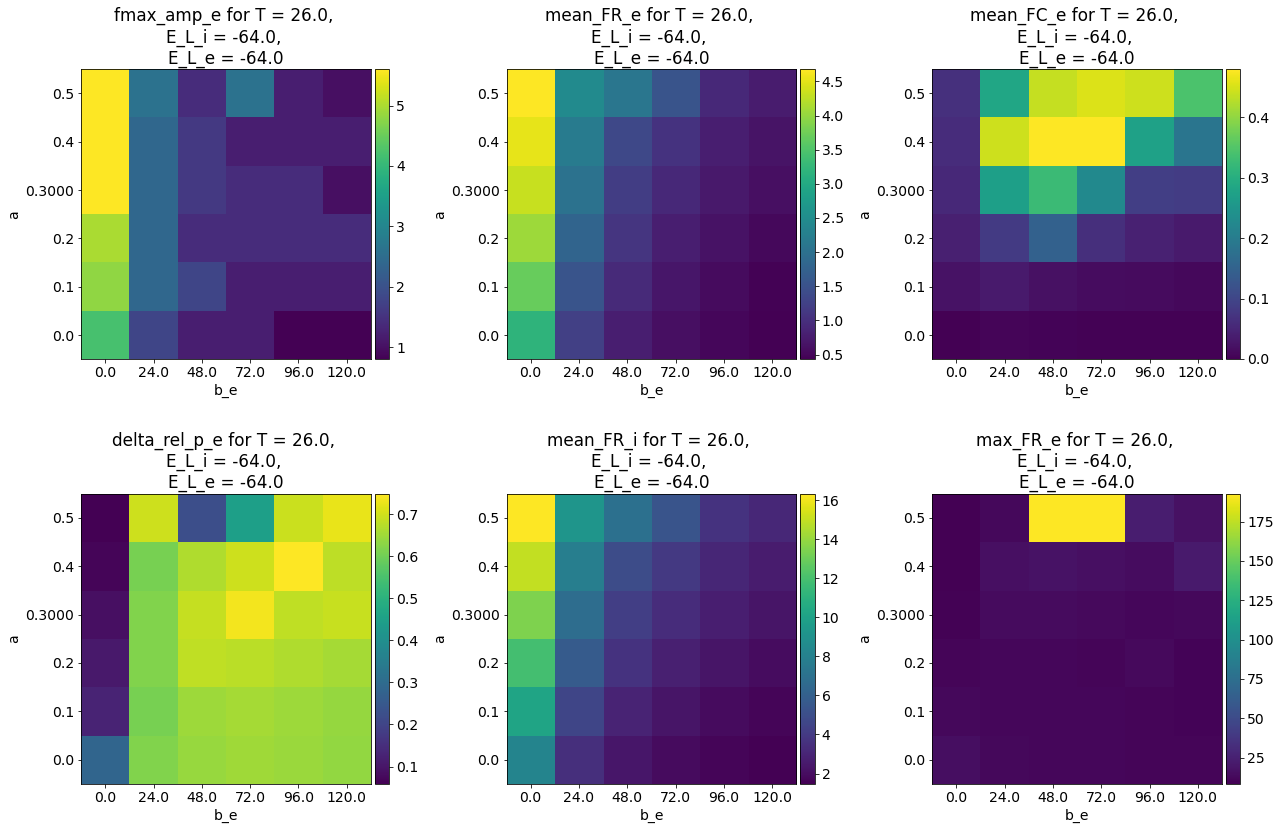

In [10]:
plt.rcParams.update({'font.size': 14})
batches_folder = './JUSUFlike/Data/FinalResults/'
fixed_params = {'T': 25, 'E_L_i': -64, 'E_L_e': -64}
params_sweep = ('b_e', 'a')

steps = 6
metrics = ['fmax_amp_e', 'mean_FR_e', 'mean_FC_e', 
           'delta_rel_p_e', 'mean_FR_i', 'max_FR_e']
fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
plt.show()

In [4]:
# Values for which we will want to obtain the data


### Look for sets of parameters that result in the maximum value of a certain metric
It might happen that we want to find the sets of parameters that result in obtaining the highest values of metrics. For instance, let's see which sets of parameters get us the higher number of DMN regions in the top 10 regions with highest mean FR. 

In [5]:
max_value_metric, pars_where_max, idxes = params_of_max_metric("fmax_amp_e",
                                                        batches_folder, avoid_bp = True, steps=6, verbose=True)

Max fmax_amp_e = 53.6
Sets of values for maximum fmax_amp_e
a= 0.0, b_e= 0.0, E_L_i= -80.0, E_L_e= -64.0, T= 5.0, 
a= 0.0, b_e= 0.0, E_L_i= -76.0, E_L_e= -60.0, T= 5.0, 


### Do all combinations of sweeps to check the parameter sweep went well

In [6]:
import itertools
execute = False
fixed_params = {'a': 0.3, 'E_L_e': -80, 'E_L_i': -80}
params_sweep = ('b_e', 'T')

parameters = ['a', 'b_e', 'E_L_i', 'E_L_e', 'T']

if execute:
    for params_sweep in itertools.combinations(parameters, 2):
        fixed_list = parameters.copy()
        for param in params_sweep:
            fixed_list.remove(param)
        fixed_params = {}
        for fixed in fixed_list:
            if fixed == 'a':
                fixed_params[fixed] = 0.5*np.random.rand()
            elif fixed == 'b_e':
                fixed_params[fixed] = 120 * np.random.rand()
            elif fixed == 'E_L_i':
                fixed_params[fixed] = -60 - 20 * np.random.rand()
            elif fixed == 'E_L_e':
                fixed_params[fixed] = -60 - 20 * np.random.rand()
            elif fixed == 'T':
                fixed_params[fixed] = 40*np.random.rand()
        print(params_sweep)
        print(fixed_params)
        steps = 6
        metrics = ['mean_FR_e', 'mean_FR_i', 'max_FR_e', 'mean_FC_e', 
                   'ratio_zscore_dmn_inh', 'ratio_frmean_dmn_exc']
        fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
        plt.show()

## Count how many combinations of parameters result in the broken point

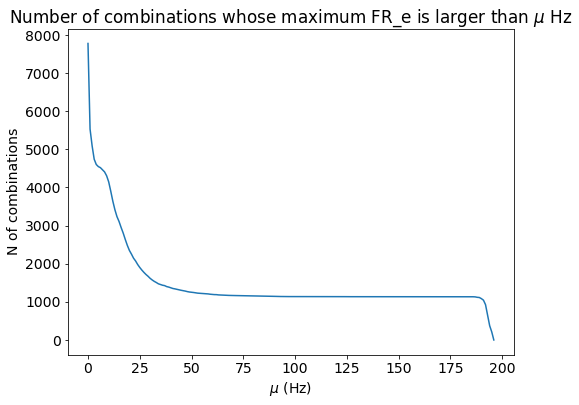

In [11]:
max_FRs_e = load_metric_sweeps('max_FR_e', './JUSUFlike/Data/FinalResults/', steps=6)
max_FRs_i = load_metric_sweeps('max_FR_e', './JUSUFlike/Data/FinalResults/', steps=6)

broken_point = np.amax(max_FRs_e)
max_frs = np.arange(np.ceil(broken_point) + 1)
n_combs_over = np.zeros_like(max_frs)
n_combs_over_e = np.zeros_like(max_frs)

for ii, max_fr in enumerate(max_frs):
    n_combs_over[ii] = np.sum(np.logical_and(max_FRs_e[:, -1] > max_fr, max_FRs_i[:, -1] > max_fr))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(max_frs, n_combs_over)
ax.set(xlabel='$\mu$ (Hz)', ylabel='N of combinations', 
       title='Number of combinations whose maximum FR_e is larger than $\mu$ Hz')
plt.show()

In [12]:
# Let us count the parameters that have the highest values
n_params = 5
steps_per_par = 6
label_params = ['a', 'b_e (pA)', 'E_L_i (mV)', 'E_L_e (mV)', 'T (ms)']
all_bins = []
all_counts = []
all_centers = []
for id_param in range(n_params):
    bins = np.zeros(steps_per_par + 1)  # 6 steps per parameter
    vals = np.sort(np.unique(max_FRs_e[:, id_param]))
    step = vals[1] - vals[0]
    bins = np.linspace(vals[0], vals[-1] + step, steps_per_par + 1) - step / 2
    centers = np.linspace(vals[0], vals[-1], steps_per_par)
    all_bins.append(bins)
    all_counts.append(np.zeros(steps_per_par))
    all_centers.append(centers)

for idx, (param_centers, param_counts) in enumerate(zip(all_centers, all_counts)):
    for ii, value in enumerate(param_centers):
        param_counts[ii] = np.sum(np.logical_and(max_FRs_e[:, -1] > broken_point-2, 
                                                 max_FRs_e[:, idx] == value))

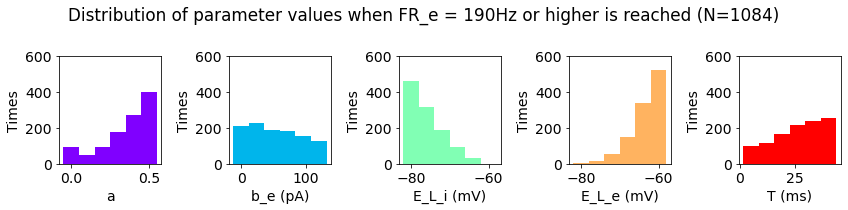

In [13]:
fig, axes = plt.subplots(1, n_params, figsize=(12, 3))
color = iter(plt.cm.rainbow(np.linspace(0, 1, n_params)))

limit_val = 190
idxes = max_FRs_e[:, -1] > limit_val
number_of_bp = np.sum(idxes)
for ii, ax in enumerate(axes):
    c = next(color)
    ax.hist(max_FRs_e[idxes, ii], bins=all_bins[ii], align='mid', color=c)
    ax.set(ylim=(0, 600), xlabel=label_params[ii], ylabel='Times')
fig.suptitle(f'Distribution of parameter values when FR_e = {limit_val}Hz or higher is reached (N={number_of_bp})')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22805/930336775.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


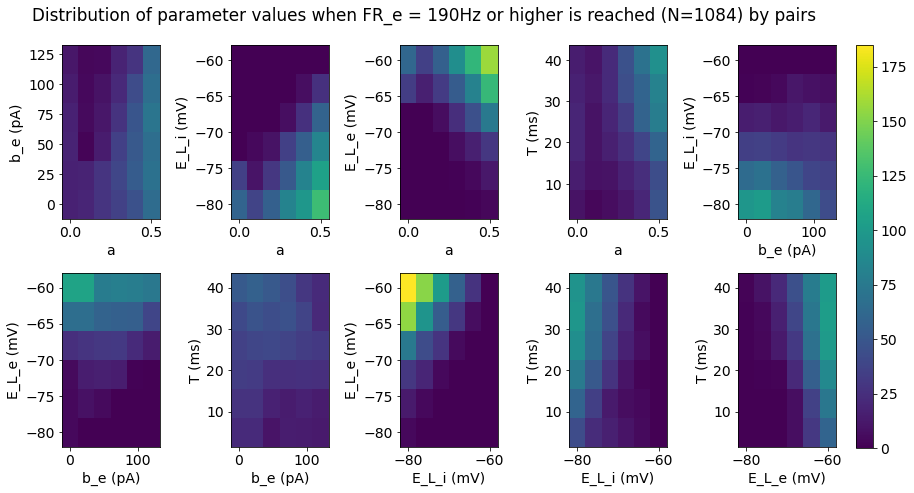

In [14]:
from itertools import combinations
fig, axes = plt.subplots(2, 5, figsize=(12, 7))
axes = axes.flatten()
limit_val = 190
idxes = max_FRs_e[:, -1] > limit_val
number_of_bp = np.sum(idxes)
for ii, (parx, pary) in enumerate(combinations(label_params, 2)):
    idx_parx = label_params.index(parx)
    idx_pary = label_params.index(pary)
    h = axes[ii].hist2d(max_FRs_e[idxes, idx_parx], max_FRs_e[idxes, idx_pary], 
                  bins=[all_bins[idx_parx], all_bins[idx_pary]], vmin=0, vmax=185)
    # print(np.amax(np.array(h[0])))  # To determine max of 
    axes[ii].set(xlabel=label_params[idx_parx], ylabel=label_params[idx_pary])


cb_ax = fig.add_axes([1,.105,.02,.8])
fig.suptitle(f'Distribution of parameter values when FR_e = {limit_val}Hz or higher is reached (N={number_of_bp}) by pairs')
plt.tight_layout()
fig.colorbar(h[-1],orientation='vertical',cax=cb_ax)
plt.show()

## Plot the time traces of the interesting regions of the parameter space.

The plots that might be interesting to have:
A plot of 6x(2 or 3) where we sweep the different values of bs in the rows and the values of a in the columns (a = 0.3, 0.4, 0.5 max) and see how they change.

It will also be interesting to have individual plots of the corners of the parameter space. So the extreme cases of a = 0, 0.5 and b = 0, 120. Additionally some in the middle for the FC.

This can be iteratively done for changing T, that way we can see how the landscape changes. I don't know how all this could be plotted in a nice figure tho (meaning the parameter grid and the regions)

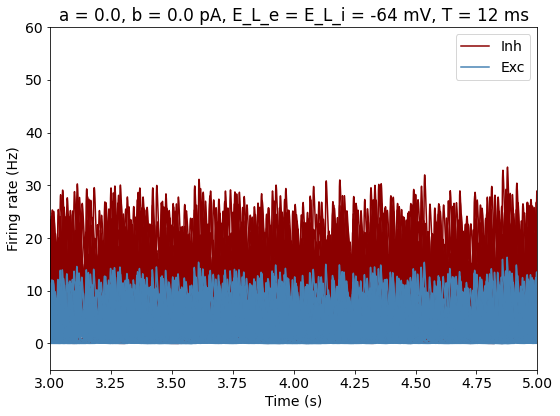

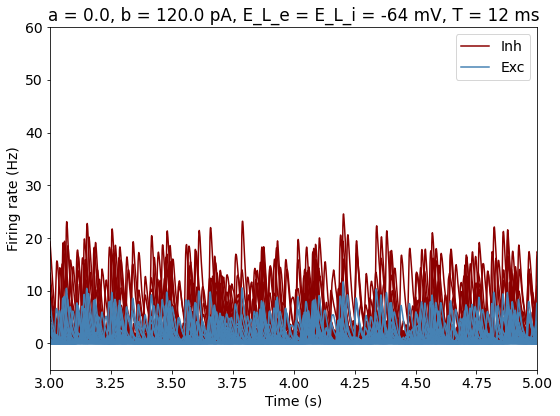

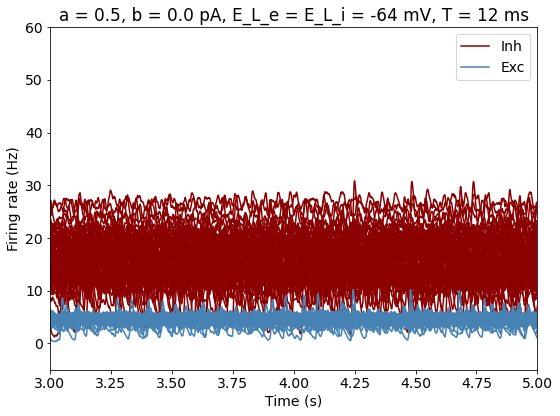

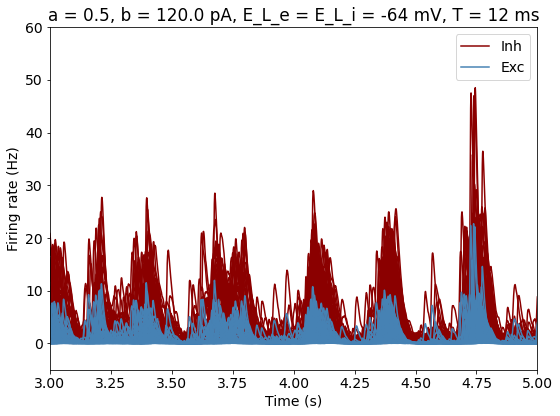

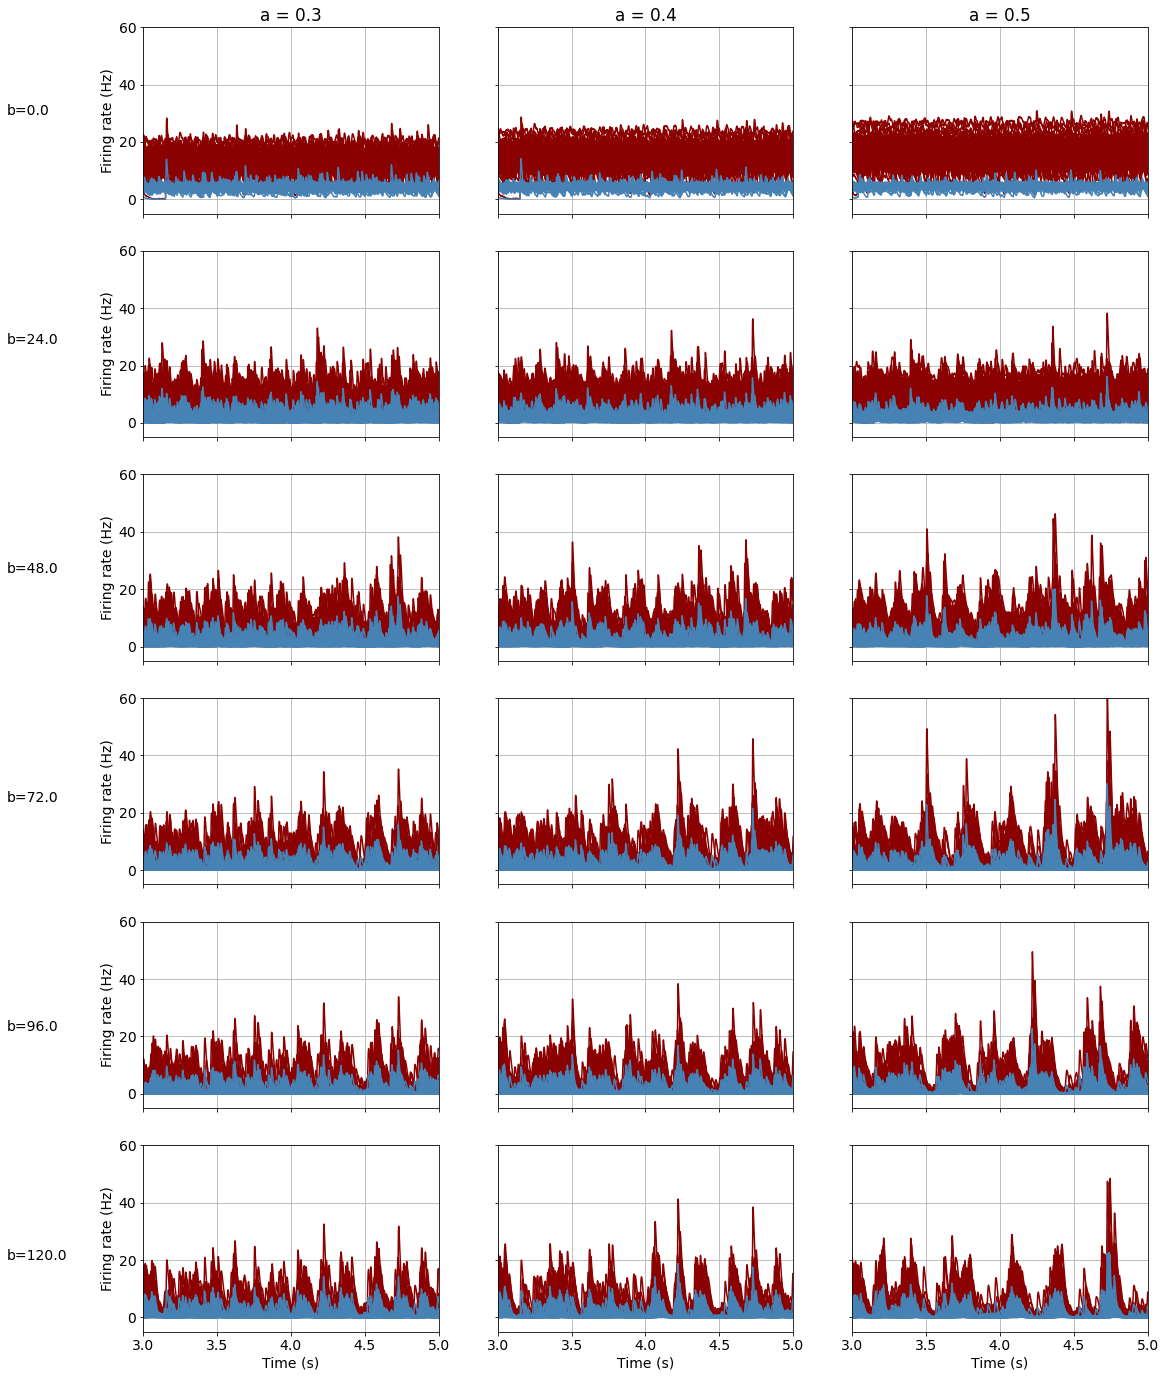

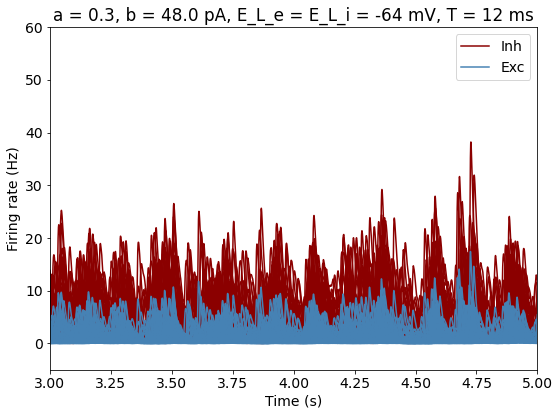

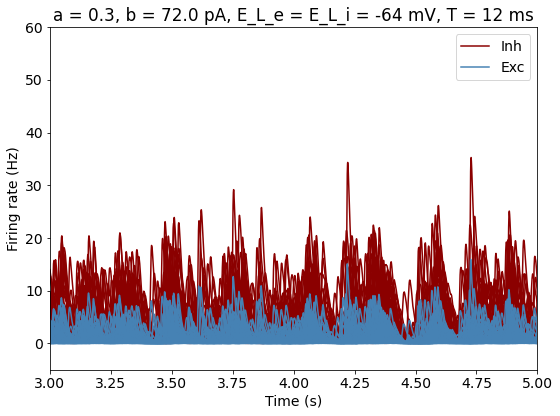

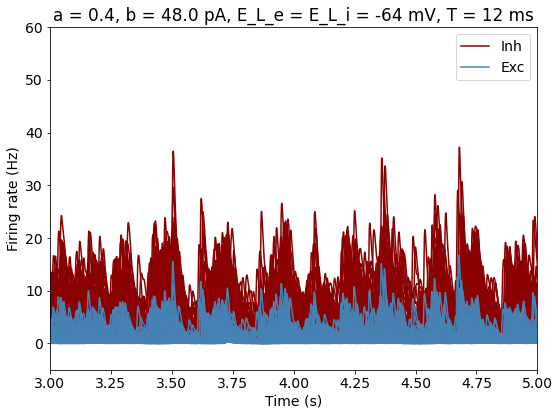

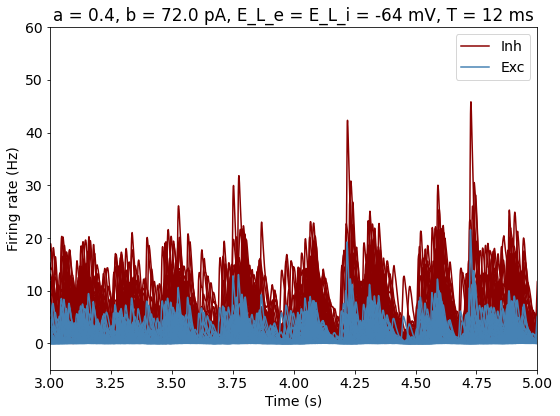

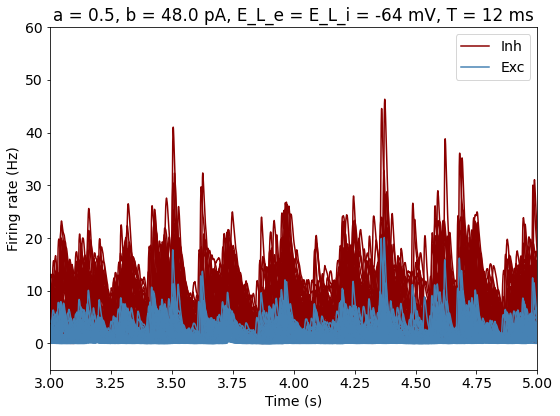

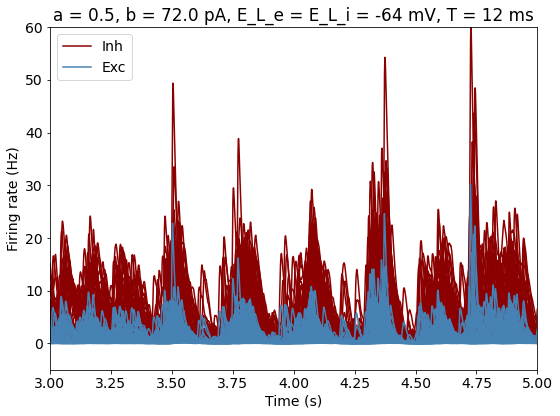

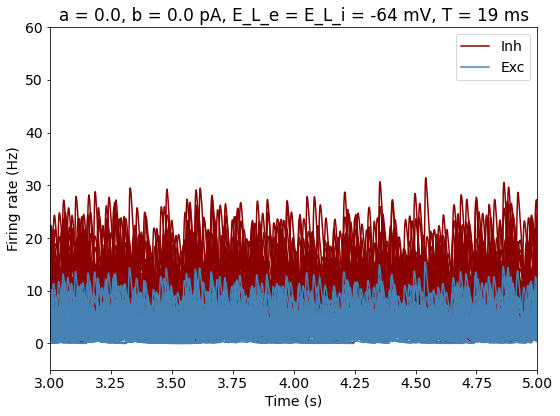

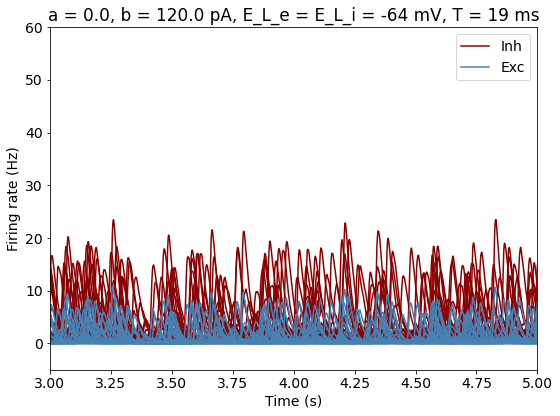

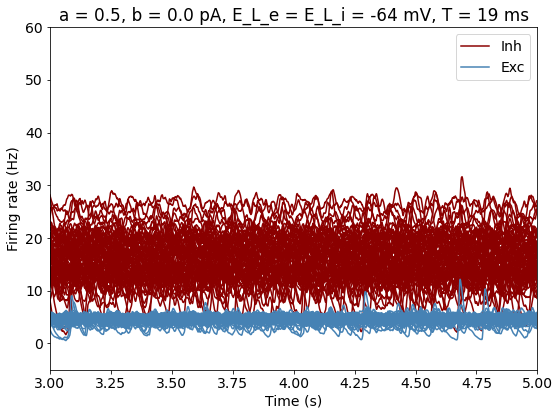

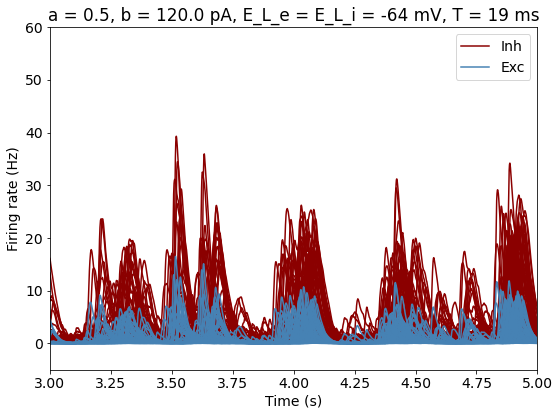

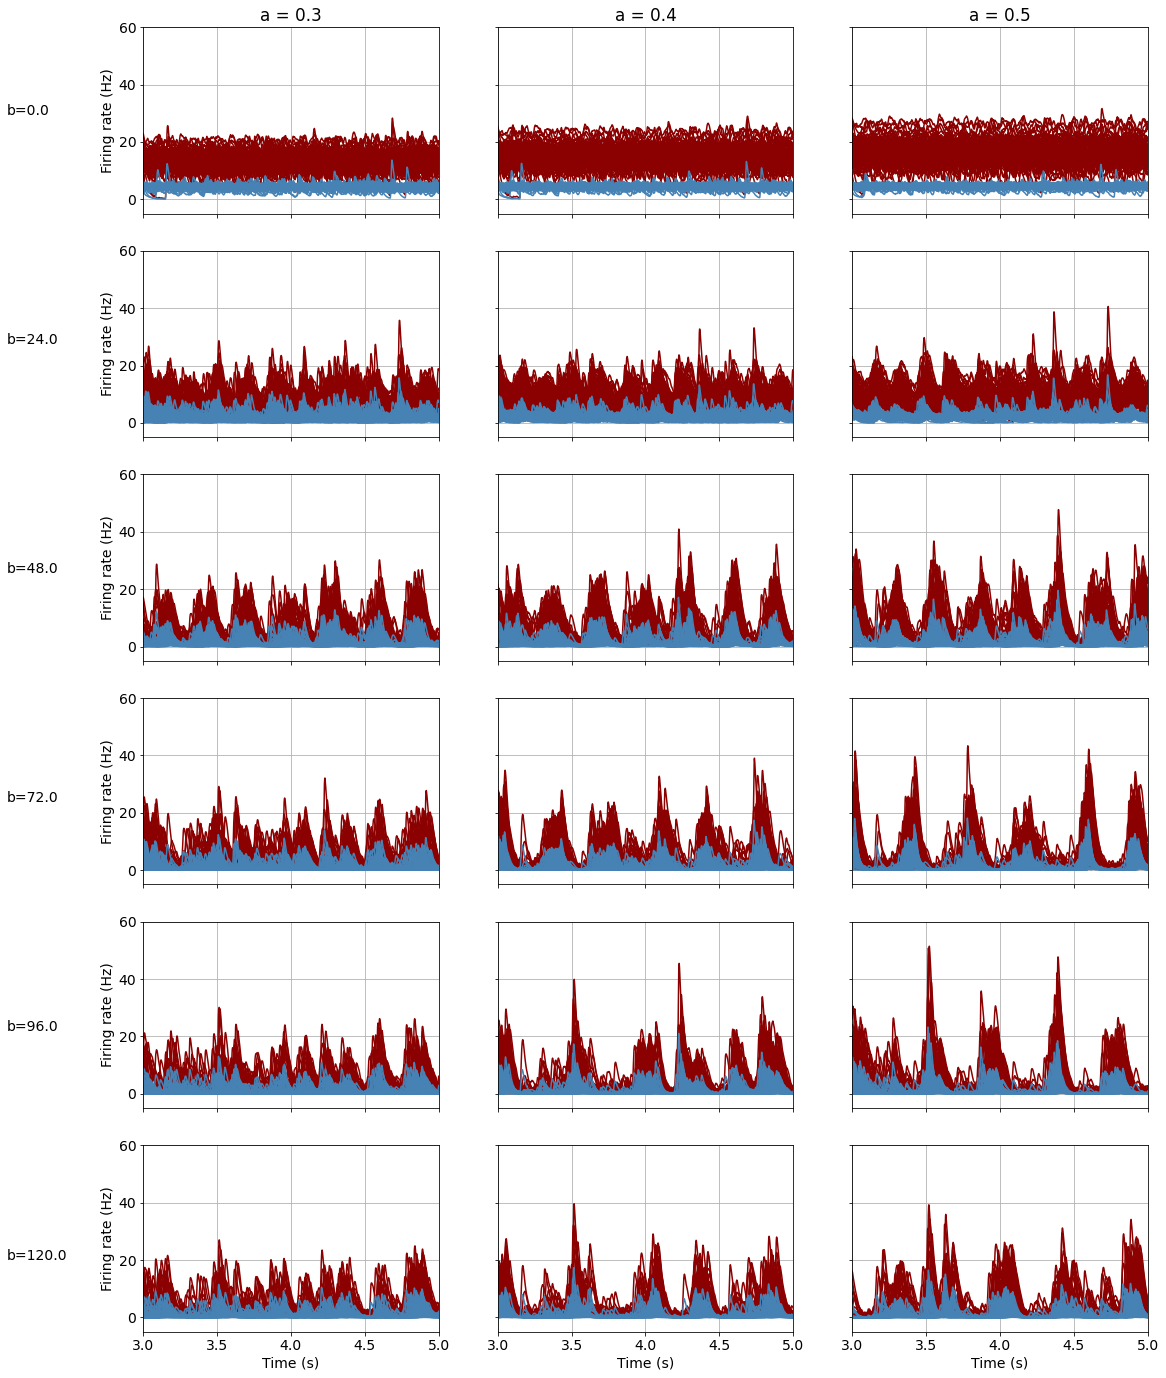

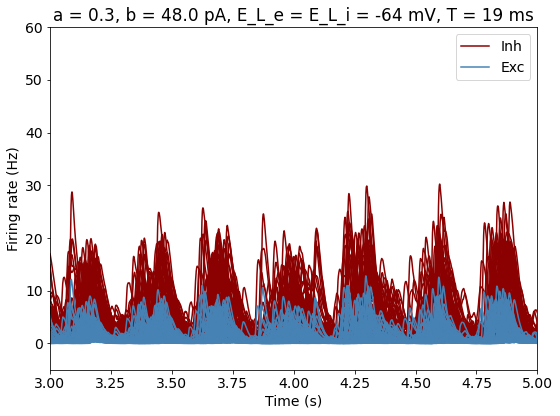

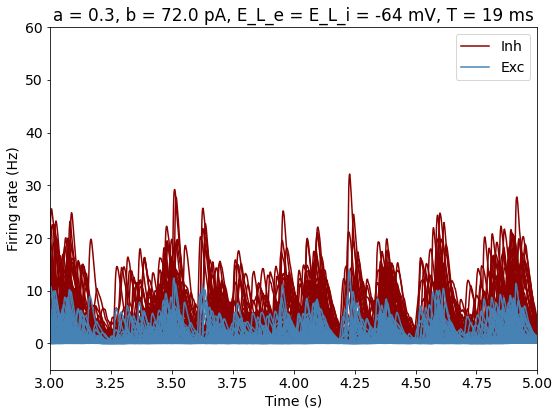

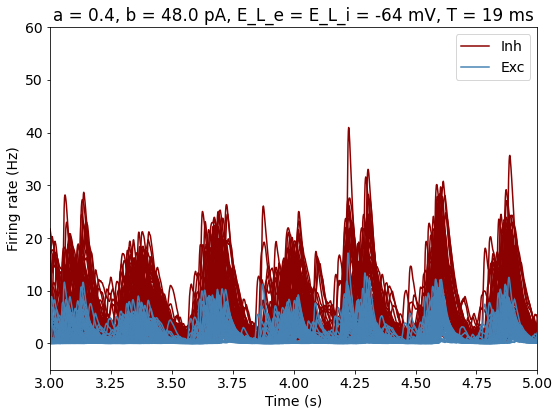

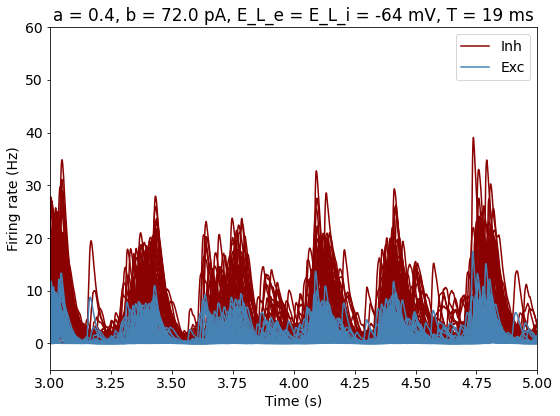

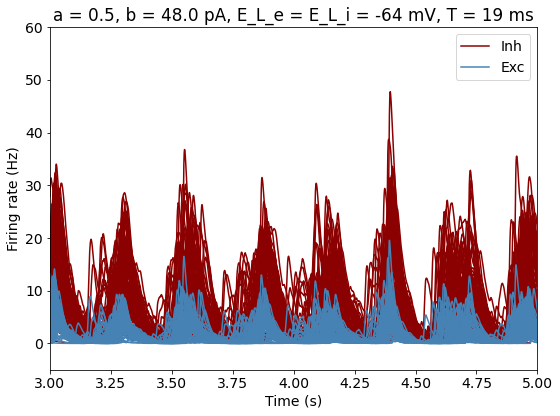

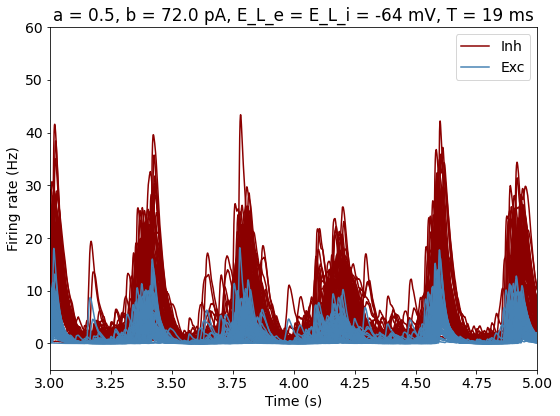

In [ ]:
folder_figures = './figures/parameter_plotting/'
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_for_plotting/'
run_sim = 5000.0
cut_transient = 2000.0
Ts = [12, 19, 26]  # Do it for every T that we have computed

corners_a = [0.0, 0.5]  # Plot the corners individually
corners_b = [0.0, 120.0]

all_bs = np.linspace(0, 120, 6).tolist()  # Interesting cases plot everything.
as_all_bs = [0.3, 0.4, 0.5]

middle_bs = [48.0, 72.0]  # Plot the middle bs individually as well
for T in Ts:
    # First the corners
    for ii, (a, b) in enumerate(itertools.product(corners_a, corners_b)):
        label_sim = '_a_' + str(a) + '_b_' + str(b) + '_ELI_-64_ELE_-64_T_' + str(T) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        FR_exc = result[0][1][:, 0, :] * 1e3
        FR_inh = result[0][1][:, 1, :] * 1e3
        time_s = result[0][0] * 1e-3
        del result
       
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        Li = ax.plot(time_s, FR_inh, label='Inh', c='darkred')
        Le = ax.plot(time_s, FR_exc, label='Exc', c='SteelBlue')
        ax.set(xlabel='Time (s)', ylabel='Firing rate (Hz)', xlim=(3, 5), ylim=(-5, 60),
               title=f'a = {a}, b = {b} pA, E_L_e = E_L_i = -64 mV, T = {T} ms')
        ax.legend([Li[0], Le[0]], ['Inh', 'Exc'], loc='best')
        plt.tight_layout()
        fig.savefig(folder_figures+label_sim[:-1] + '.png')
        plt.show(folder_figures+label_sim[:-1] + '.png')
       
    # Then the sweeps
    fig, axes = plt.subplots(len(all_bs), len(as_all_bs),
                        figsize=(6 * len(as_all_bs), 4 * len(all_bs)),
                        sharex='col', sharey='row')
    for jj, a in enumerate(as_all_bs):
        for ii, b in enumerate(all_bs):
            ax = axes[ii, jj]
            label_sim = '_a_' + str(a) + '_b_' + str(b) + '_ELI_-64_ELE_-64_T_' + str(T) + '/'
            file_name = folder_root + label_sim
            result = tools.get_result(file_name, cut_transient, run_sim)
            FR_exc = result[0][1][:, 0, :] * 1e3
            FR_inh = result[0][1][:, 1, :] * 1e3
            time_s = result[0][0] * 1e-3
            del result
            Li = ax.plot(time_s, FR_inh, label='Inh', c='darkred')
            Le = ax.plot(time_s, FR_exc, label='Exc', c='SteelBlue')
            ax.set(xlim=(3, 5), ylim=(-5, 60))
            if ii == 0:
                ax.set_title(f'a = {a}')
            if ii == len(all_bs) - 1:
                ax.set(xlabel='Time (s)')
            if jj == 0:
                ax.set(ylabel='Firing rate (Hz)')
            ax.grid()

    height = 1/(len(all_bs))
    for yy in range(len(all_bs)):
        plt.text(0.02, height, f'b={all_bs[-(yy+1)]}', transform=plt.gcf().transFigure)
        height += 0.1325
    fig.savefig(folder_figures + 'sweeps_ELI_-64_ELE_-64_T_' + str(T) + '.png')
    plt.show()
   
    # Finally the interesting cases individually
    for ii, (a, b) in enumerate(itertools.product(as_all_bs, middle_bs)):
        label_sim = '_a_' + str(a) + '_b_' + str(b) + '_ELI_-64_ELE_-64_T_' + str(T) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        FR_exc = result[0][1][:, 0, :] * 1e3
        FR_inh = result[0][1][:, 1, :] * 1e3
        time_s = result[0][0] * 1e-3
        del result
       
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        Li = ax.plot(time_s, FR_inh, label='Inh', c='darkred')
        Le = ax.plot(time_s, FR_exc, label='Exc', c='SteelBlue')
        ax.set(xlabel='Time (s)', ylabel='Firing rate (Hz)', xlim=(3, 5), ylim=(-5, 60),
               title=f'a = {a}, b = {b} pA, E_L_e = E_L_i = -64 mV, T = {T} ms')
        ax.legend([Li[0], Le[0]], ['Inh', 'Exc'], loc='best')
        plt.tight_layout()
        fig.savefig(folder_figures+label_sim[:-1] + '.png')
        plt.show()
    plt.close()

# Looking for values that might result in longer upstates
In what metrics might we be interested:
- As always, the max FR since it will let us know when we reach the broken point
- Mean and standard deviation of the firing rate. It should be useful to let us know if we are in UD state or not.
- I am guessing mean up and mean down duration although the algorithm might not be as optimal as needed.
- fmax and pmax might also be useful although I don't trust them completely.
- delta alpha beta relative power

And what parameters will we want to observe?
- I think we can fix b. Justifying that we already have UD states when varying b. Now we want to see what other combinations of parameters allow us to obtain longer UD states.
- From preliminary results it seemed that low connectivity + higher b might help us obtain those sustained up states. So we might try to fix a low and b high and see the results.
- As a first approach, maybe just leave one E_L fixed in the classical ~64 mV value and sweep over T and other E_L_s. The problem will eb

In [ ]:
batches_folder = './JUSUFlike/Data/FinalResults/'
fixed_params = {'T': 20, 'E_L_i': -64, 'E_L_e': -64}
params_sweep = ('b_e', 'a')

steps = 6
metrics = ['fmax_amp_e', 'mean_FR_e', 'mean_FC_e',
           'pmax_amp_e', 'mean_FR_i', 'max_FR_e',
           'delta_rel_p_e', 'theta_rel_p_e', 'alpha_rel_p_e',
           'beta_rel_p_e', 'mean_up_e', 'mean_down_e']
fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
plt.show() 